# Assignment Part-I Task-2

Name: Michael Merrick  SID: 44849354

**Task-2** Classification on Landsat Satellite Data (2.5 marks): The data set consists of the multi-spectral values of pixels in 3x3 neighbourhoods in a satellite image, and the label information associated with the central pixel in each neighbourhood. This data set was generated from Landsat Multi-Spectral Scanner image data. To facilitate your data analysis process, we have done sampling and data pre-processing for you. All the features are named as “Feature #”, and the last attribute is the label (each number corresponds to a class). This is a multi-class classification problem.

Notes:

1). You need to tune the hyperparameter K for the KNN classifier, and impurity heuristics (information gain or Gini) for the decision tree classifier. Also, the pruning methods could be considered to tune the decision trees.


In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import neighbors
from sklearn import metrics
from matplotlib import pyplot as plt

from numpy import sqrt
from numpy import mean
from numpy import absolute
from sklearn.metrics import pairwise_distances
from scipy.cluster.hierarchy import linkage, dendrogram, cut_tree
from scipy.spatial.distance import pdist 

In [2]:
data=pd.read_csv('data/landsat/landsat.csv')
data

,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,Feature 9,Feature 10,...,Feature 28,Feature 29,Feature 30,Feature 31,Feature 32,Feature 33,Feature 34,Feature 35,Feature 36,Label
0,92,115,120,94,84,102,106,79,84,102,...,104,88,121,128,100,84,107,113,87,3
1,84,102,106,79,84,102,102,83,80,102,...,100,84,107,113,87,84,99,104,79,3
2,84,102,102,83,80,102,102,79,84,94,...,87,84,99,104,79,84,99,104,79,3
3,80,102,102,79,84,94,102,79,80,94,...,79,84,99,104,79,84,103,104,79,3
4,84,94,102,79,80,94,98,76,80,102,...,79,84,103,104,79,79,107,109,87,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,51,68,85,71,51,75,93,79,55,75,...,79,56,81,97,79,52,73,93,79,1
5996,55,75,96,79,55,72,93,71,55,72,...,79,52,66,86,72,52,66,82,68,1
5997,55,72,93,71,55,72,85,75,59,79,...,72,52,66,82,68,56,70,82,72,1
5998,55,72,85,75,59,79,93,75,59,91,...,68,56,70,82,72,56,84,97,79,1


In [3]:
## Pre-processing and sampling already done, doublechecked anyway(reuslts removed for brevity, no issues found)
## data.isnull().sum()

## Quickly identifying the range of classifications availiable. I contemplated changing 7 to 6 since 6 was otherwise absent,
## but decided against it.
print("Unique Classes: ", data['Label'].unique())

##All columns are feature columns, hence:
X=data.loc[:, data.columns != 'Label']
##And obviously we are classifying for Label.
y=data.Label

Unique Classes:  [3 4 5 7 2 1]


## Part 1: KNN


best parameter:  {'n_neighbors': 7}
best score:  0.8778333333333335


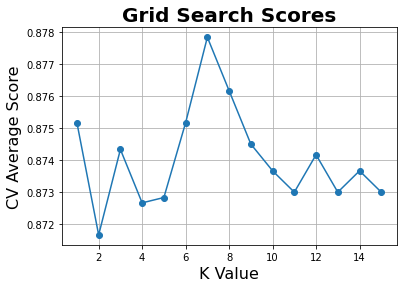

In [4]:
from sklearn.model_selection import GridSearchCV

## Using GridSearch to assist in identifying the best hyper parameter
parameters = {'n_neighbors': [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]}
neigh = neighbors.KNeighborsClassifier()
clf = GridSearchCV(neigh, parameters,scoring = 'accuracy', cv = 10)
clf.fit(X, y)


## Note: https://stackoverflow.com/questions/37161563/how-to-graph-grid-scores-from-gridsearchcv provided the following
## function to display GridSearchCV results in an efficient manner, however I had to adapt it to our purposes here
def plot_grid_search(cv_results, grid_param_1, grid_param_2, name_param_1, name_param_2):
    # Get Test Scores Mean and std for each grid search
    scores_mean = cv_results['mean_test_score']
    scores_mean = np.array(scores_mean).reshape(len(grid_param_2),len(grid_param_1))

    scores_sd = cv_results['std_test_score']
    scores_sd = np.array(scores_sd).reshape(len(grid_param_2),len(grid_param_1))

    # Plot Grid search scores
    _, ax = plt.subplots(1,1)

    # Param1 is the X-axis, Param 2 is represented as a different curve (color line)
    for idx, val in enumerate(grid_param_2):
        ax.plot(grid_param_1, scores_mean[idx,:], '-o', label= name_param_2 + ': ' + str(val))

    ax.set_title("Grid Search Scores", fontsize=20, fontweight='bold')
    ax.set_xlabel(name_param_1, fontsize=16)
    ax.set_ylabel('CV Average Score', fontsize=16)
    ax.grid('on')

## Calling Method 
plot_grid_search(clf.cv_results_, parameters['n_neighbors'], ['accuracy'], 'K Value', 'Max Features')

print("\nbest parameter: ", clf.best_params_)
print("best score: ", clf.best_score_)

As GridSearchCV makes clear, 7 is the ideal value for our hyper parameter K, which we will use for our KNN model in the following code.

In [5]:

##Splitting data into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y)

#Setting K to 7 as identified by gridsearch
neigh = neighbors.KNeighborsClassifier(n_neighbors=7)

# training the model
neigh.fit(X_train,y_train)

# model predictions on the train set
y_predictions = neigh.predict(X_train)
# report accuracy score on the train set
print("Accuracy score on the train set: ", metrics.accuracy_score(y_train, y_predictions))
# report complete classification report
print("\n", metrics.classification_report(y_train, y_predictions))

# model predictions on the test set
y_predictions = neigh.predict(X_test)
print("Accuracy score on the test set: ", metrics.accuracy_score(y_test, y_predictions))

# report complete classification report
print("\n", metrics.classification_report(y_test, y_predictions))

Accuracy score on the train set:  0.926

               precision    recall  f1-score   support

           1       0.98      0.98      0.98       930
           2       0.99      0.98      0.98       520
           3       0.92      0.96      0.94       933
           4       0.79      0.76      0.77       482
           5       0.94      0.91      0.92       488
           7       0.91      0.91      0.91      1147

    accuracy                           0.93      4500
   macro avg       0.92      0.92      0.92      4500
weighted avg       0.93      0.93      0.93      4500

Accuracy score on the test set:  0.902

               precision    recall  f1-score   support

           1       0.97      0.99      0.98       351
           2       0.95      0.96      0.96       168
           3       0.91      0.91      0.91       339
           4       0.68      0.69      0.68       139
           5       0.93      0.80      0.86       157
           7       0.88      0.90      0.89      

The resulting model scores fairly well across the classification metrics chosen, with a roughly 90% success rate on the test dataset. Of particular note is the poor results classifying for the label '4', even taking into conisderation the low amount of samples, which hit a low of ~70%, with '1' being the easiest to classify for.

## Part 2: DecisionTree

In [6]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=142)


## Doing another GridsearchCV to find the best paramters for a Decision Tree
tree_parameters = {'criterion':['gini','entropy'],'max_depth':[None, 1,2,3,4,5,6,7,8,9,10,11,12,15,20], 'min_impurity_decrease':[0,0.0001, 0.001, 0.01, 0.1, 1]}

clft = GridSearchCV(dt, tree_parameters, scoring = 'accuracy', cv = 5)
clft.fit(X, y)

print("\nbest parameter: ", clft.best_params_)
print("best score: ", clft.best_score_)




best parameter:  {'criterion': 'entropy', 'max_depth': 8, 'min_impurity_decrease': 0}
best score:  0.8370000000000001


Information gain, with a max depth of 8 and a min impurity decrease of 0 returned the best results.

In [7]:
#Instantiating a new Deicison Tree according to the best paramater values found by the GridsearchCV
dt = DecisionTreeClassifier(random_state=142, criterion='entropy', max_depth=8)

# model training on the training data
dt.fit(X_train, y_train)

# There was no need to show making predictions on the train set as it will be 100% accurate with a DCT model
# for all metrics regardless

# making predictions on the test set
y_pred = dt.predict(X_test)
# reporting accuracy score on the test set
print("Accuracy score on the test set: ", metrics.accuracy_score(y_test, y_pred))
# reporting classification report on the test set
print("\n", metrics.classification_report(y_test, y_pred))


Accuracy score on the test set:  0.8513333333333334

               precision    recall  f1-score   support

           1       0.93      0.98      0.96       351
           2       0.92      0.90      0.91       168
           3       0.89      0.91      0.90       339
           4       0.59      0.45      0.51       139
           5       0.85      0.71      0.78       157
           7       0.78      0.86      0.82       346

    accuracy                           0.85      1500
   macro avg       0.83      0.80      0.81      1500
weighted avg       0.85      0.85      0.85      1500



While the decision tree model performed somewhat adequetely across classification metrics, it performed generally worse than our KNN classifier. Again, classifying for '4' proved paritcularly challenging for this model, and overall saw a 5% drop in the accuracy of its predictions from the KNN model.